# TRANSFERÊNCIA DE CALOR E MECÂNICA DOS SÓLIDOS - APS 2

#### Membros
##### Andresa Buchala dos Campos Bicudo 
##### Beatri Cabral Fernandes 
##### Leonardo Duarte Malta de Abreu 

In [27]:
#importando as bibilotecas
from math import *
from numpy import *
from matplotlib import pyplot as plt

In [28]:
# DEFINICAO DE PARAMETROS
tol = 1e-10
L = 300e-3

#densidade [kg/m3]
d = 2700 

# diametro e raio[m]
D = 5e-3
r = D/2

#perimetro e area
P = 2*pi*r
A = pi*r**2

#condutividade termica [W/mK]
k = 180

#calor especifico [J/KgK]
Cp = 896

# difusividade térmica  [m2/s]
alpha = k/(d*Cp) 

#Temperatura da base
Tb = 100

#Temperatura ambiente
Ta = 25

# coeficiente de conveccao [W/m2K]
h = 100

# intervalo espacial 11 nós
dx = 300e-3/10 

# intervalo temporal -> ate o erro zerar
dt = (dx**2)/(alpha*((h*P*(dx**2))/(k*A)+2))

# Criando intervalos 
x = arange(0, L+dx, dx) 
t = arange(0, 1000+dt, dt) 

## 1) Equacionamento
![Equação 1](fotos_equacoes/eq1.png)
A partir da forma geral da equação da energia para uma
superfície estendida, podemos observar que o proplema proposto trata-se de um problema em apena uma dimensao. Desta forma, deve-se analisar o comportamento da temperatura ao longo do comprimento da aleta.
![Equação 2](fotos_equacoes/eq2.png)
Assim, devemos isolar Tl+1, para obter a temperatura no tempo seguinte
![Equação 3](fotos_equacoes/eq3.png)

## 2) Gráfico de Temperatura x Posição

In [29]:
#Temperatura
T = zeros((len(t),len(x))) # matriz[l][i]
T[:,0] = T[-1] = Tb
T[:,1:len(x)] = Ta

T

array([[100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       ...,
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.],
       [100.,  25.,  25., ...,  25.,  25.,  25.]])

In [30]:
erro_final = 100
for l in range(1, len(t)):
    for i in range(1, len(x) -1):
        T[l,i] = (alpha*dt/dx**2)*(T[l-1,i+1] - 2*T[l-1,i] + T[l-1,i-1]) - ((h*P*alpha*dt)/(k*A))*(T[l-1,i] - Ta) +T[l-1,i]
    erro_final = max(abs((T[l,1:-1] - T[l-1,1:-1])/T[l,1:-1]))

    if erro_final<tol:
        break

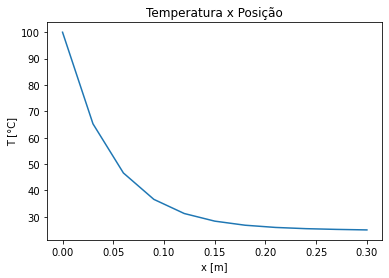

In [31]:
plt.plot(x, T[l])
plt.title("Temperatura x Posição")
plt.xlabel("x [m]")
plt.ylabel("T [°C]")
plt.show()

## 3) Comparação 

A equação que descreve a destribuição da temperatura na aleta, dado uma temperatura especificada na extremidade de 25°C é:

In [53]:
m = sqrt((h*P)/(k*A))
θ_l = 25 - Ta
θ_b = Tb - Ta
θ_l/θ_b

0.0

In [51]:
T2 = []
for i in range(len(x)):
    T2.append(((θ_l/θ_b)*(sinh(m*(L-x[i]))+sinh(m*(L-x[i]))))/(sinh(m*L)))

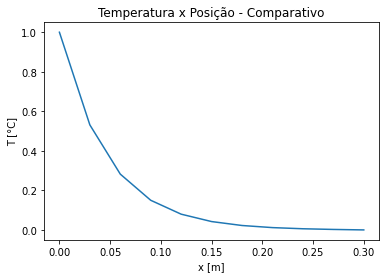

In [52]:
plt.plot(x, T2)
plt.title("Temperatura x Posição - Comparativo")
plt.xlabel("x [m]")
plt.ylabel("T [°C]")
plt.show()